# Insurance Claim Fraud Detection

### Business case:

Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.


In [87]:
# Importing all the required libreries.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_recall_curve,roc_curve

## Examining The Data

In [2]:
#Reading dataset 
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')

In [5]:
#Checking dataset head
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

In [6]:
#Checking Information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

* Dataset containes float64(2), int64(17), object(21) type of data
* We can see there are no null values in this information

In [7]:
#Checking dataset types
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

* Here we can check columns type

In [8]:
#Checking dataset shape
df.shape

(1000, 40)

* Dataset contains 1000 rows and 40 columns.

In [11]:
#Checking dataset columns
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

* Dataset contains 40 columns.

## Summary Statistics

In [12]:
#checking describe
df.describe()

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  _c39  
count     1000.000000    1000.000000  1000.000000   0.0  
mean      7399.570000   37928.950000  2005.103000   NaN  
std       4824.726179   18886.252893     6.015861   NaN  
min          0.000000      70.000000  1995.000000   NaN  
25%       4445.000000   30292.500000  2000.000000   NaN  
50%       6750.000000   42100.000000  2005.000000   NaN  
75%      10885.000000   50822.500000  2010.000000   NaN  
max      23670.000000   79560.000000  2015.000000   NaN

* There are no missing values in the dataset 
* Mean is more than Median 50% in all the columns
* There is a large difference in 75% 
* In one and two observation suggest that there are extream outliers present in these three columns.

In [13]:
#checking target variable type
df.fraud_reported.unique()

array(['Y', 'N'], dtype=object)

* Target/Dependent variable is discrete and categoricle in nature.

In [15]:
#checking target variable count
df.fraud_reported.value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

* Here we can see the count of target variables

## Data Visualization

<AxesSubplot:xlabel='months_as_customer', ylabel='count'>

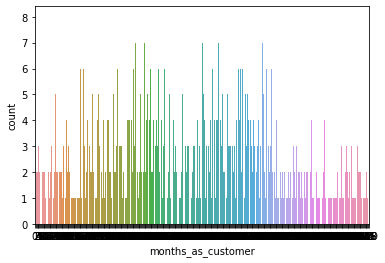

In [16]:
#ploting countplot for months as customer
sns.countplot(df['months_as_customer'])

* Data distribution looks normal here

<AxesSubplot:xlabel='age', ylabel='count'>

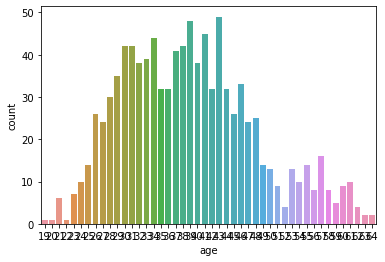

In [17]:
#ploting sns countplot for age
sns.countplot(df['age'])

* data is not distributed normally here.

<AxesSubplot:xlabel='policy_number', ylabel='count'>

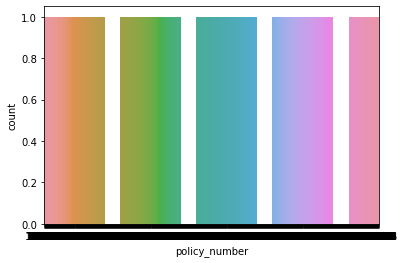

In [18]:
#ploting countpolt for policy number
sns.countplot(df['policy_number'])

* Here data is normally distributed

<AxesSubplot:xlabel='bodily_injuries', ylabel='count'>

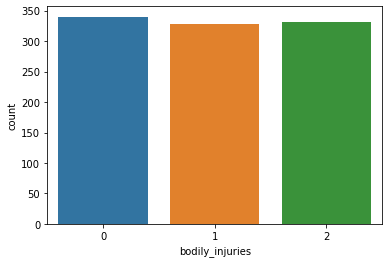

In [19]:
#ploting sns countplot for bodily injuries
sns.countplot(df['bodily_injuries'])

* Here also data is distributed normally

<AxesSubplot:xlabel='witnesses', ylabel='count'>

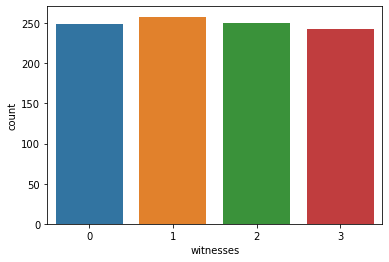

In [20]:
#ploting countplot for witnesses
sns.countplot(df['witnesses'])

* Data is distributed normally in this column.

<AxesSubplot:xlabel='auto_year', ylabel='count'>

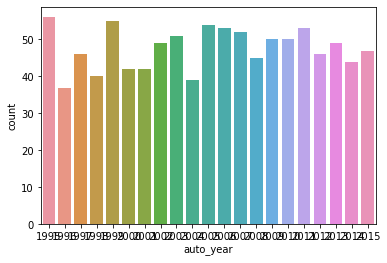

In [21]:
#ploting countplot for auto year
sns.countplot(df['auto_year'])

* Data is not distributed normally

<AxesSubplot:>

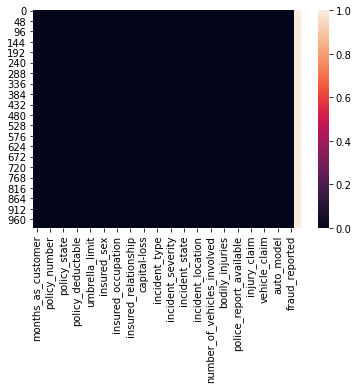

In [22]:
#ploting heatmap to see the null values
sns.heatmap(df.isnull())

* Here we can check the null values

In [24]:
#checking correlation 
dfcor=df.corr()

In [25]:
#checking dfcor
dfcor

months_as_customer       age  policy_number  \
months_as_customer                     1.000000  0.922098       0.057555   
age                                    0.922098  1.000000       0.059413   
policy_number                          0.057555  0.059413       1.000000   
policy_deductable                      0.026807  0.029188      -0.006738   
policy_annual_premium                  0.005018  0.014404       0.022566   
umbrella_limit                         0.015498  0.018126       0.008968   
insured_zip                            0.017895  0.025604       0.007083   
capital-gains                          0.006399 -0.007075       0.009802   
capital-loss                           0.020209  0.007368      -0.005669   
incident_hour_of_the_day               0.070639  0.087161       0.000113   
number_of_vehicles_involved            0.014736  0.022102       0.013432   
bodily_injuries                       -0.010162 -0.015679      -0.004558   
witnesses                              0.058383  0.052359      -0.012661   
total_claim_amount                     0.062108  0.069863      -0.018009   
injury_claim                           0.065329  0.075522      -0.008762   
property_claim                         0.034940  0.060898      -0.010678   
vehicle_claim                          0.061013  0.062588      -0.020184   
auto_year                             -0.000292  0.001354      -0.000183   
_c39                                        NaN       NaN            NaN   

                             policy_deductable  policy_annual_premium  \
months_as_customer                    0.026807               0.005018   
age                                   0.029188               0.014404   
policy_number                        -0.006738               0.022566   
policy_deductable                     1.000000              -0.003245   
policy_annual_premium                -0.003245               1.000000   
umbrella_limit                        0.010870              -0.006247   
insured_zip                           0.004545               0.032354   
capital-gains                         0.035212              -0.013738   
capital-loss                         -0.023544               0.023547   
incident_hour_of_the_day              0.060935              -0.001578   
number_of_vehicles_involved           0.051214              -0.045991   
bodily_injuries                      -0.022765               0.026780   
witnesses                             0.066639               0.002332   
total_claim_amount                    0.022839               0.009094   
injury_claim                          0.039107              -0.017633   
property_claim                        0.064792              -0.011654   
vehicle_claim                         0.005269               0.020246   
auto_year                             0.026105              -0.049226   
_c39                                       NaN                    NaN   

                             umbrella_limit  insured_zip  capital-gains  \
months_as_customer                 0.015498     0.017895       0.006399   
age                                0.018126     0.025604      -0.007075   
policy_number                      0.008968     0.007083       0.009802   
policy_deductable                  0.010870     0.004545       0.035212   
policy_annual_premium             -0.006247     0.032354      -0.013738   
umbrella_limit                     1.000000     0.019671      -0.047268   
insured_zip                        0.019671     1.000000       0.006303   
capital-gains                     -0.047268     0.006303       1.000000   
capital-loss                      -0.024056     0.049372      -0.046904   
incident_hour_of_the_day          -0.023257     0.008274      -0.016406   
number_of_vehicles_involved       -0.021270     0.027448       0.061643   
bodily_injuries                    0.022743     0.028695       0.055829   
witnesses                         -0.006738     0.019805      -0.017651 

<AxesSubplot:>

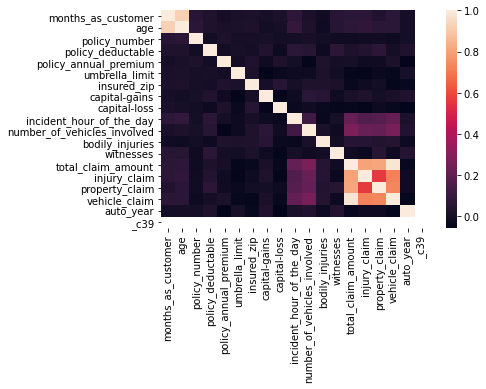

In [26]:
#ploting heatmap to dfcor
sns.heatmap(dfcor)

* Here we can check corresponding values of dataset
* Light shades are highly correlated

<AxesSubplot:>

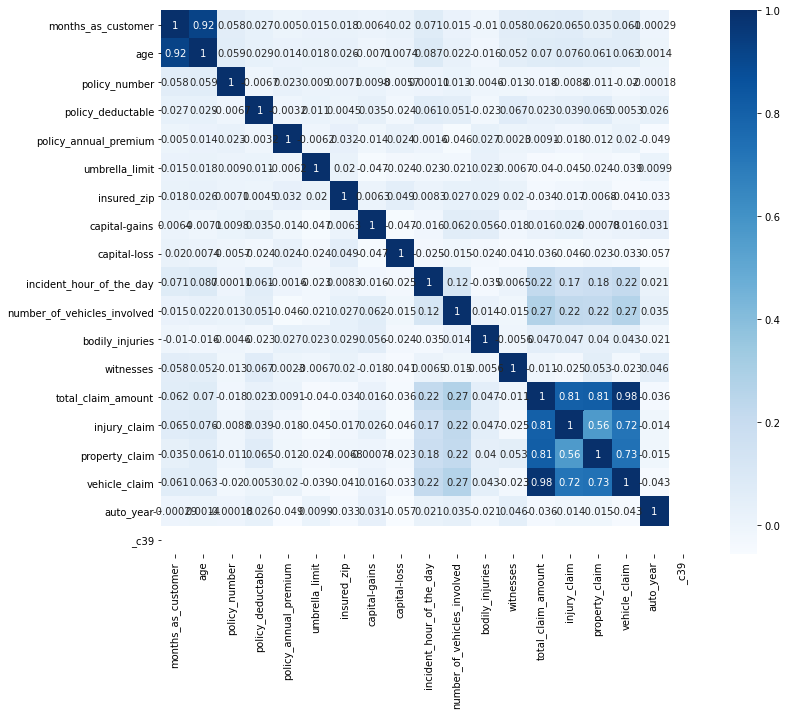

In [28]:
#ploting figure heatmap
plt.figure(figsize=(12,10))
sns.heatmap(dfcor,cmap='Blues',annot=True)

* Dark shades are highly correlated

<AxesSubplot:>

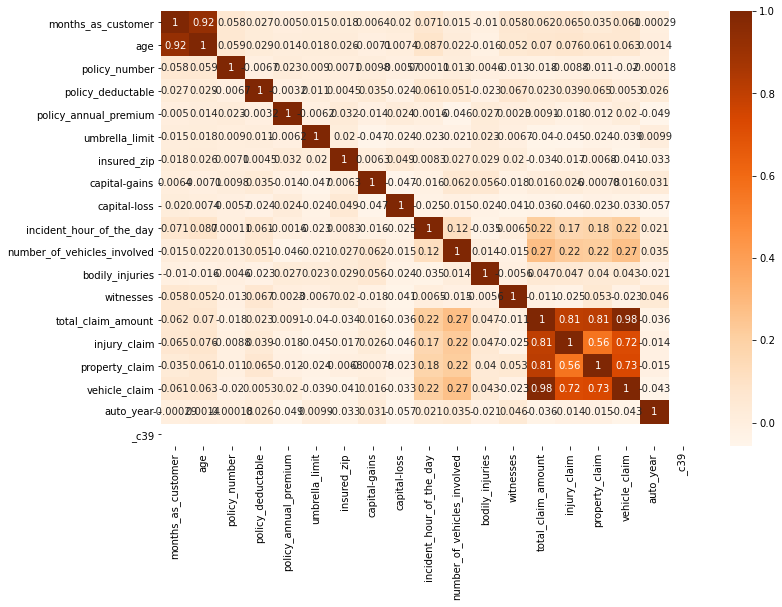

In [29]:
#ploting heatmap to see the correlation
plt.figure(figsize=(12,8))
sns.heatmap(dfcor,cmap='Oranges',annot=True)

* Light shades are highly correlated
* _c39 is highly correlated with auto_year
* auto_year is highly negatively correlated with injury_claim
* injury_claim is highly positively correlated with number_of_involved
* age is negatively correlated with _c39
* capital-gains is highly correlated with capital-loss

## Plotting Outliers

In [30]:
#cheking columns
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

<AxesSubplot:>

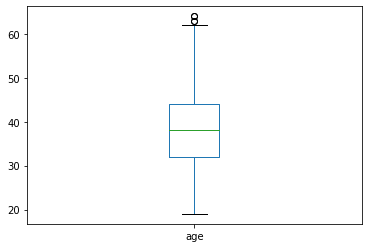

In [31]:
df['age'].plot.box()

* boxplot have no outside the viscous so we cant find outliers here.

<AxesSubplot:>

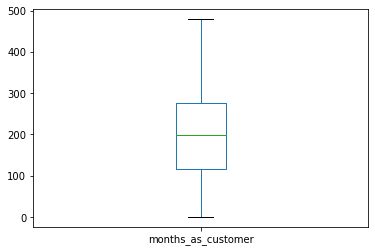

In [33]:
df['months_as_customer'].plot.box()

* boxplot have no outside the viscous so we cant find outliers here.

<AxesSubplot:>

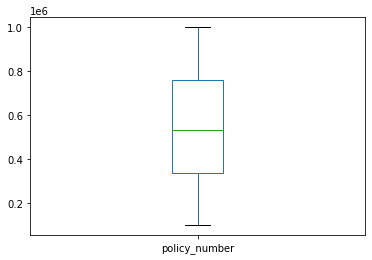

In [34]:
df['policy_number'].plot.box()

* boxplot have no outside the viscous so we cant find outliers here.

<AxesSubplot:>

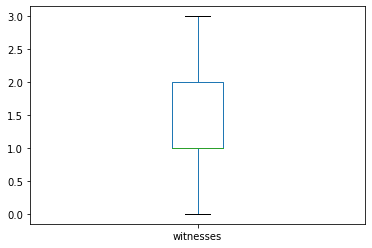

In [35]:
df['witnesses'].plot.box()

* boxplot have no outside the viscous so we cant find outliers here.

<AxesSubplot:>

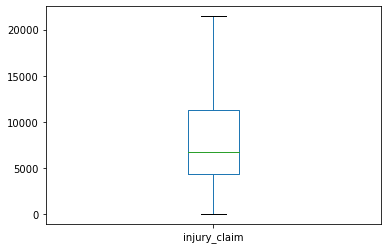

In [36]:
df['injury_claim'].plot.box()

* boxplot have no outside the viscous so we cant find outliers here.

<AxesSubplot:>

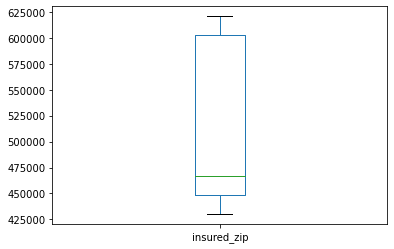

In [38]:
df['insured_zip'].plot.box()

* boxplot have no outside the viscous so we cant find outliers here.

<AxesSubplot:>

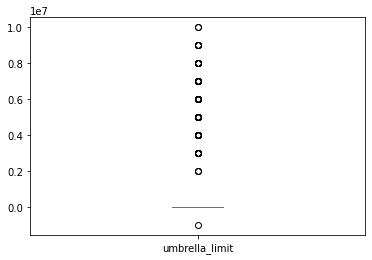

In [39]:
df['umbrella_limit'].plot.box()

* Here boxplot have no outside the viscous so we cant find outliers here.

<AxesSubplot:>

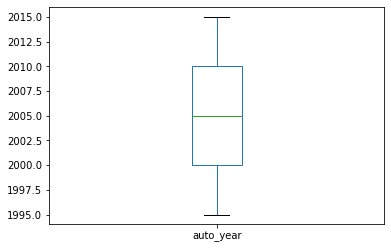

In [40]:
df['auto_year'].plot.box()

* Here boxplot have no outside the viscous so we cant find outliers here.

In [41]:
#checking dataset shape
df.shape

(1000, 40)

* Dataset contains 1000 rows and 40 columns

### Distribution of skewness

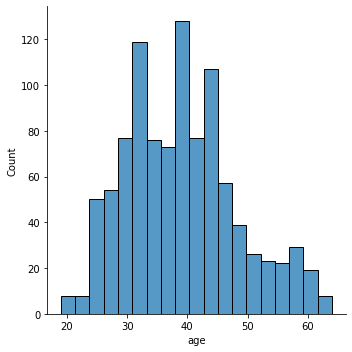

In [42]:
#ploting displot to check skewness
sns.displot(df['age'])

* Data is not distributed normally in this column.

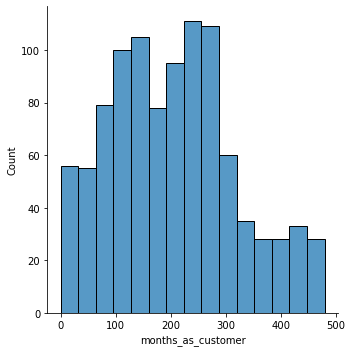

In [43]:
#ploting displot to check skewness
sns.displot(df['months_as_customer'])

* Data is not distributed normally in this column.

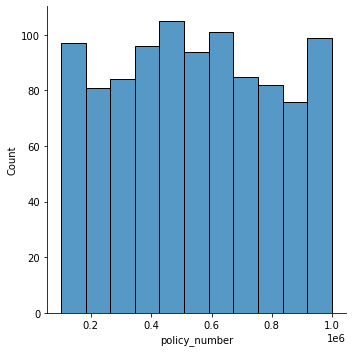

In [44]:
#ploting displot to check skewness
sns.displot(df['policy_number'])

* Data is not distributed normally in this column.

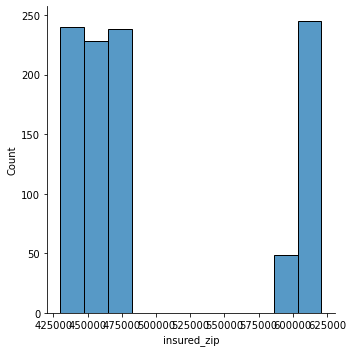

In [45]:
#ploting displot to check skewness
sns.displot(df['insured_zip'])

* Data is not distributed normally in this column.

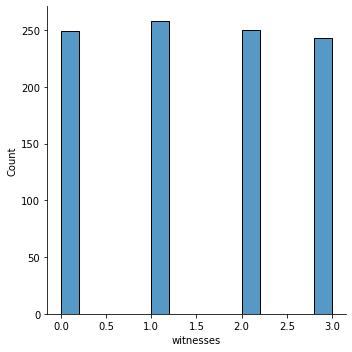

In [46]:
#ploting displot to check skewness
sns.displot(df['witnesses'])

* Data is not distributed normally in this column.

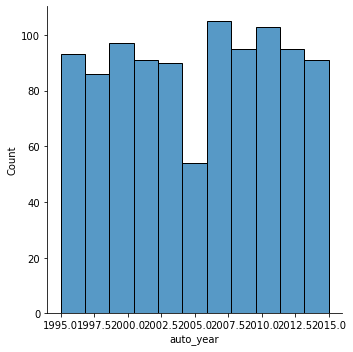

In [47]:
#ploting displot to check skewness
sns.displot(df['auto_year'])

* Data is not distributed normally in this column.

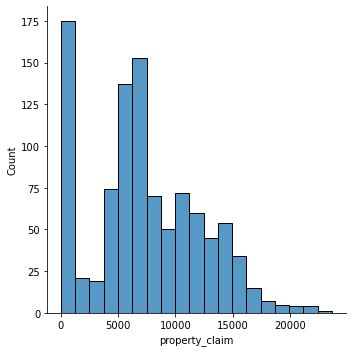

In [48]:
#ploting displot to check skewness
sns.displot(df['property_claim'])

* Data is not distributed normally in this column.

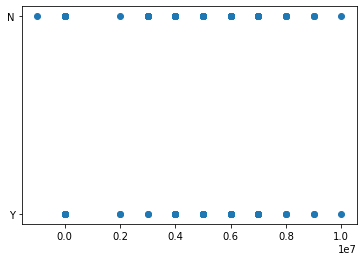

In [49]:
#ploting scatter plot
plt.scatter(df['umbrella_limit'],df['fraud_reported'])

* Here we can see plot of umbrella_limit and fraud_reported

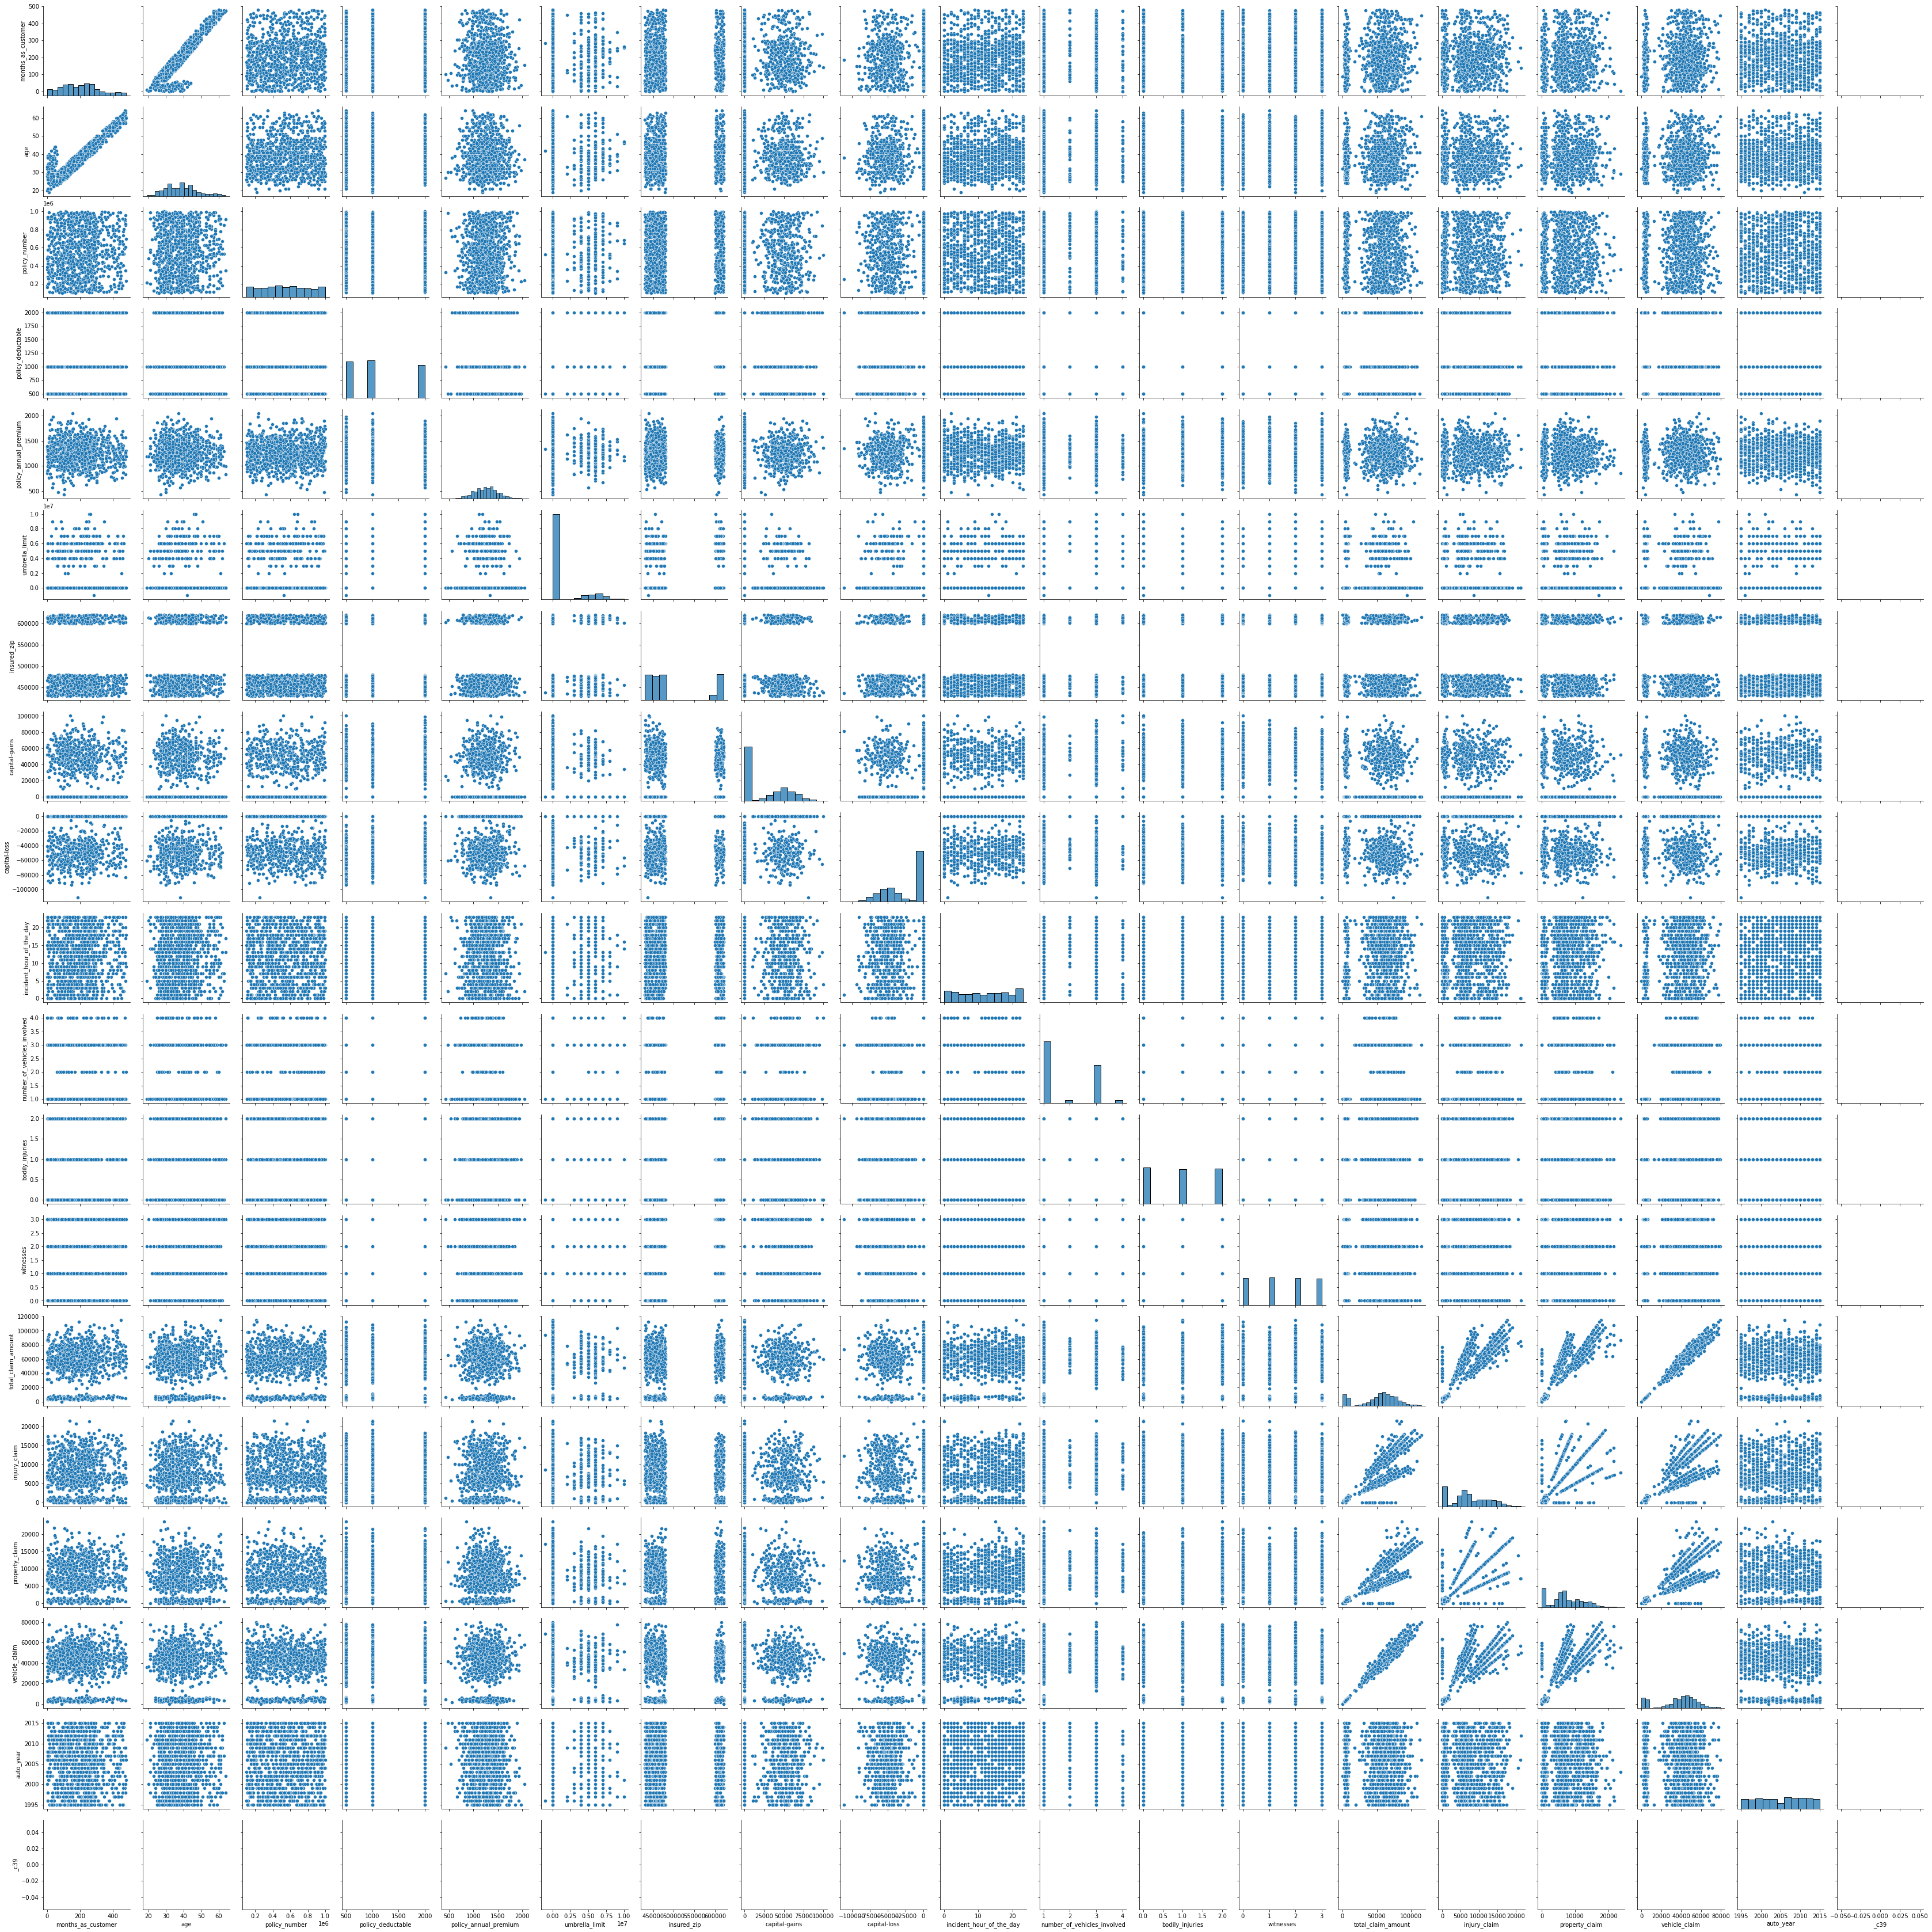

In [50]:
#ploting pairplot
sns.pairplot(df)

* Have to remove the missing values
* Have to drop nagatively correlated columns
* Have to remove the outliers

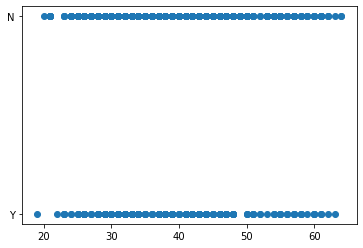

In [51]:
#ploting scatter plot
plt.scatter(df['age'],df['fraud_reported'])
plt.show()

* Here we can see the plot of age and fraud reported.

In [52]:
#droping age which i feel not effective
df.drop('age',axis=1,inplace=True)

In [53]:
#checking head 
df.head()

months_as_customer  policy_number policy_bind_date policy_state policy_csl  \
0                 328         521585       17-10-2014           OH    250/500   
1                 228         342868       27-06-2006           IN    250/500   
2                 134         687698       06-09-2000           OH    100/300   
3                 256         227811       25-05-1990           IL    250/500   
4                 228         367455       06-06-2014           IL   500/1000   

   policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  \
0               1000                1406.91               0       466132   
1               2000                1197.22         5000000       468176   
2               2000                1413.14         5000000       430632   
3               2000                1415.74         6000000       608117   
4               1000                1583.91         6000000       610706   

  insured_sex  ... police_report_available total_claim_amount injury_claim  \
0        MALE  ...                     YES              71610         6510   
1        MALE  ...                       ?               5070          780   
2      FEMALE  ...                      NO              34650         7700   
3      FEMALE  ...                      NO              63400         6340   
4        MALE  ...                      NO               6500         1300   

  property_claim  vehicle_claim  auto_make auto_model auto_year  \
0          13020          52080       Saab        92x      2004   
1            780           3510   Mercedes       E400      2007   
2           3850          23100      Dodge        RAM      2007   
3           6340          50720  Chevrolet      Tahoe      2014   
4            650           4550     Accura        RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 39 columns]

* After removing age column dataset contains only 39 columns.

## Encoding Method

In [54]:
#Encoding using Label Encoder
#importing LabelEncoder
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
for i in df.columns:
    df[i]=LE.fit_transform(df[i])

In [55]:
#checking dataset head
df.head()

months_as_customer  policy_number  policy_bind_date  policy_state  \
0                 299            480               532             2   
1                 212            257               821             1   
2                 123            672               186             2   
3                 239            140               766             0   
4                 212            286               181             0   

   policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0           1                  1                    732               1   
1           1                  2                    396               5   
2           0                  2                    740               5   
3           1                  2                    743               6   
4           2                  1                    902               6   

   insured_zip  insured_sex  ...  police_report_available  total_claim_amount  \
0          486            1  ...                        2                 563   
1          519            1  ...                        0                  44   
2            6            0  ...                        1                 143   
3          812            0  ...                        1                 451   
4          850            1  ...                        1                  81   

   injury_claim  property_claim  vehicle_claim  auto_make  auto_model  \
0           258             512            545         10           1   
1            46              45             38          8          12   
2           337             104            116          4          30   
3           245             249            521          3          34   
4            70              36             66          0          31   

   auto_year  fraud_reported  _c39  
0          9               1     0  
1         12               1     0  
2         12               0     0  
3         19               1     0  
4         14               0     0  

[5 rows x 39 columns]

### Remoing Outliers

In [56]:
#importing zscore to remove outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.14895094e+00, 6.75500153e-02, 2.09499849e-01, ...,
        1.83440399e-01, 1.74601919e+00,            nan],
       [2.77600296e-01, 8.40045062e-01, 1.25939678e+00, ...,
        3.15490877e-01, 1.74601919e+00,            nan],
       [6.13781395e-01, 5.97557827e-01, 1.04747018e+00, ...,
        3.15490877e-01, 5.72731393e-01,            nan],
       ...,
       [6.53843494e-01, 1.39430160e+00, 1.25944037e-01, ...,
        1.51392380e+00, 5.72731393e-01,            nan],
       [1.93016186e+00, 1.73205167e-03, 3.58447164e-01, ...,
        1.18130295e+00, 5.72731393e-01,            nan],
       [1.92014633e+00, 8.14064287e-02, 4.18985166e-01, ...,
        3.15490877e-01, 5.72731393e-01,            nan]])

In [57]:
#threshhold
threshold=3
print(np.where(z>3))

(array([ 31,  48,  88, 115, 119, 262, 314, 430, 458, 503, 657, 700, 875,
       922, 975]), array([7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]))


In [58]:
#creating new dataset
df_new=df[(z<3).all(axis=1)]
df_new

Empty DataFrame
Columns: [months_as_customer, policy_number, policy_bind_date, policy_state, policy_csl, policy_deductable, policy_annual_premium, umbrella_limit, insured_zip, insured_sex, insured_education_level, insured_occupation, insured_hobbies, insured_relationship, capital-gains, capital-loss, incident_date, incident_type, collision_type, incident_severity, authorities_contacted, incident_state, incident_city, incident_location, incident_hour_of_the_day, number_of_vehicles_involved, property_damage, bodily_injuries, witnesses, police_report_available, total_claim_amount, injury_claim, property_claim, vehicle_claim, auto_make, auto_model, auto_year, fraud_reported, _c39]
Index: []

[0 rows x 39 columns]

In [59]:
#cheking data shape
df.shape

(1000, 39)

In [60]:
#checking new data shape
df_new.shape

(0, 39)

## Standerd Scaler Method

In [62]:
#importing standard scaler method
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaledX=scaler.fit_transform(df)

In [63]:
#cheking scaledX
scaledX

array([[ 1.14895094e+00, -6.75500153e-02,  2.09499849e-01, ...,
        -1.83440399e-01,  1.74601919e+00,  0.00000000e+00],
       [ 2.77600296e-01, -8.40045062e-01,  1.25939678e+00, ...,
         3.15490877e-01,  1.74601919e+00,  0.00000000e+00],
       [-6.13781395e-01,  5.97557827e-01, -1.04747018e+00, ...,
         3.15490877e-01, -5.72731393e-01,  0.00000000e+00],
       ...,
       [-6.53843494e-01,  1.39430160e+00,  1.25944037e-01, ...,
        -1.51392380e+00, -5.72731393e-01,  0.00000000e+00],
       [ 1.93016186e+00,  1.73205167e-03,  3.58447164e-01, ...,
        -1.18130295e+00, -5.72731393e-01,  0.00000000e+00],
       [ 1.92014633e+00,  8.14064287e-02, -4.18985166e-01, ...,
         3.15490877e-01, -5.72731393e-01,  0.00000000e+00]])

## PCA

In [65]:
#importing PCA
from sklearn.decomposition import PCA
testpca=PCA()
Y=testpca.fit(scaledX)

In [66]:
#variance ratio
Y.explained_variance_ratio_

array([1.09837226e-01, 4.59583033e-02, 3.77355844e-02, 3.51749274e-02,
       3.38348971e-02, 3.30888644e-02, 3.15596377e-02, 3.12595179e-02,
       3.02610044e-02, 2.99772593e-02, 2.89987455e-02, 2.87073027e-02,
       2.83109060e-02, 2.80500286e-02, 2.74412356e-02, 2.67856550e-02,
       2.62115615e-02, 2.60428950e-02, 2.55041193e-02, 2.52783198e-02,
       2.45633795e-02, 2.40204934e-02, 2.36150895e-02, 2.30403649e-02,
       2.24345978e-02, 2.15885385e-02, 2.13572946e-02, 2.08584811e-02,
       2.06480011e-02, 2.01021696e-02, 1.90928837e-02, 1.87372982e-02,
       1.54572650e-02, 1.32591210e-02, 1.10548145e-02, 7.28560139e-03,
       2.72598058e-03, 1.40635155e-04, 6.10869895e-34])

In [67]:
#var cumulative 
var_cumu=np.cumsum(Y.explained_variance_ratio_)*100
var_cumu

array([ 10.98372261,  15.57955294,  19.35311137,  22.87060411,
        26.25409382,  29.56298027,  32.71894403,  35.84489582,
        38.87099626,  41.86872219,  44.76859674,  47.63932701,
        50.4704176 ,  53.27542046,  56.01954402,  58.69810952,
        61.31926567,  63.92355517,  66.4739671 ,  69.00179908,
        71.45813702,  73.86018636,  76.22169531,  78.5257318 ,
        80.76919157,  82.92804542,  85.06377488,  87.14962299,
        89.21442309,  91.22464005,  93.13392842,  95.00765824,
        96.55338474,  97.87929683,  98.98477829,  99.71333843,
        99.98593648, 100.        , 100.        ])

In [69]:
k = np.argmax(var_cumu>99)
print('Number of components explaining 99% variance:',k)

Number of components explaining 99% variance: 35


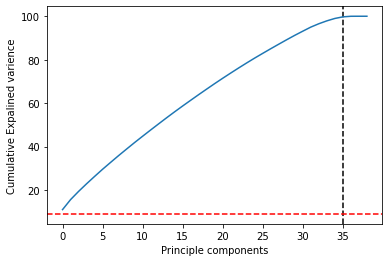

In [70]:
#ploting cumulative varience
plt.ylabel('Cumulative Expalined varience')
plt.xlabel('Principle components')
plt.axvline(x=k, color="k",linestyle="--")
plt.axhline(y=9, color="r",linestyle="--")

plt.plot(var_cumu)
plt.show()


* Here the plot contains x axis is principle components and y axis contains cumulative expalined varience

Handling missing value

In [71]:
#cheking missing value
df.isnull().sum()

months_as_customer             0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_clai

* There are no missing values

In [72]:
# filling missing values by mean and mediam method
df["auto_make"]=df["auto_make"].fillna(df["auto_make"].mean())
df["auto_model"]=df["auto_model"].fillna(df["auto_model"].median())

Checking skewness

In [74]:
#cheking skewness
df.skew()

months_as_customer             0.092231
policy_number                  0.000000
policy_bind_date               0.005194
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.063505
policy_annual_premium         -0.004022
umbrella_limit                 1.936066
insured_zip                    0.001683
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.894996
capital-loss                  -0.810352
incident_date                  0.004756
incident_type                  0.101507
collision_type                -0.193345
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000
incident_hour_of_the_day      -0.035584


* There are some columns contains skewness

## Model building 

In [75]:
#preparing x and y
x_train=df.drop('fraud_reported',axis=1)
y_train=df['fraud_reported']

In [76]:
#cheking x train head
x_train.head()

months_as_customer  policy_number  policy_bind_date  policy_state  \
0                 299            480               532             2   
1                 212            257               821             1   
2                 123            672               186             2   
3                 239            140               766             0   
4                 212            286               181             0   

   policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0           1                  1                    732               1   
1           1                  2                    396               5   
2           0                  2                    740               5   
3           1                  2                    743               6   
4           2                  1                    902               6   

   insured_zip  insured_sex  ...  witnesses  police_report_available  \
0          486            1  ...          2                        2   
1          519            1  ...          0                        0   
2            6            0  ...          3                        1   
3          812            0  ...          2                        1   
4          850            1  ...          1                        1   

   total_claim_amount  injury_claim  property_claim  vehicle_claim  auto_make  \
0                 563           258             512            545         10   
1                  44            46              45             38          8   
2                 143           337             104            116          4   
3                 451           245             249            521          3   
4                  81            70              36             66          0   

   auto_model  auto_year  _c39  
0           1          9     0  
1          12         12     0  
2          30         12     0  
3          34         19     0  
4          31         14     0  

[5 rows x 38 columns]

* Now dataset contains 38 columns

In [77]:
#checking y train dataset head
y_train.head()

0    1
1    1
2    0
3    1
4    0
Name: fraud_reported, dtype: int64

* y_train dataset contains fraud_repored

In [78]:
#x train shape
x_train.shape

(1000, 38)

* x train contains 1000 rows and 38 columns

In [79]:
y_train.shape

(1000,)

* y train contains only 1000 rows 

## Classifier Method

In [80]:
#importing accuracy score ans train test method
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [81]:
x=df.drop('fraud_reported',axis=1)
y=df['fraud_reported']
x_train,x_test,y_train, y_test=train_test_split(x,y,random_state=50, test_size=0.2)

In [84]:
#writing for loop 
for i in range(200):
    x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.33, random_state=i)
    from sklearn.tree import DecisionTreeClassifier
    lm=DecisionTreeClassifier()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    accu=accuracy_score(y_test,pred)
    print(accu*100,'at random_state',i)

80.9090909090909 at random_state 0
79.39393939393939 at random_state 1
77.57575757575758 at random_state 2
76.66666666666667 at random_state 3
80.3030303030303 at random_state 4
78.18181818181819 at random_state 5
78.18181818181819 at random_state 6
77.27272727272727 at random_state 7
80.3030303030303 at random_state 8
76.66666666666667 at random_state 9
78.18181818181819 at random_state 10
73.93939393939394 at random_state 11
78.78787878787878 at random_state 12
81.81818181818183 at random_state 13
82.12121212121211 at random_state 14
78.18181818181819 at random_state 15
79.0909090909091 at random_state 16
79.6969696969697 at random_state 17
78.78787878787878 at random_state 18
76.06060606060606 at random_state 19
78.18181818181819 at random_state 20
76.66666666666667 at random_state 21
74.54545454545455 at random_state 22
79.39393939393939 at random_state 23
76.96969696969697 at random_state 24
76.96969696969697 at random_state 25
80.60606060606061 at random_state 26
76.6666666666666

### DecisionTreeClassifier

In [85]:
#importing DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=.30, random_state=i)
    mod= DecisionTreeClassifier()
    mod.fit(x_train, y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=1
print('Best accuracy is', maxAccu, 'on Random_state',maxRS)

Best accuracy is 0.8566666666666667 on Random_state 1


In [88]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)
print("Decision Tree Classifier: \n\n",classification_report(y_test,y_pred_dt))
print("Test Accuracy:{}%".format(round(dt.score(x_test,y_test)*100,2)))

Decision Tree Classifier: 

               precision    recall  f1-score   support

           0       0.87      0.83      0.85       229
           1       0.52      0.61      0.56        71

    accuracy                           0.78       300
   macro avg       0.70      0.72      0.71       300
weighted avg       0.79      0.78      0.78       300

Test Accuracy:77.67%


* The test accuracy of Decision Tree Classifier is 77.67%

### LogisticRegression

In [91]:
# importing Logistic Regression
from sklearn.linear_model import LogisticRegression

In [92]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)
print("Logistic Regression Classifier: \n\n",classification_report(y_test,y_pred_lr))
print("Test Accuracy:{}%".format(round(lr.score(x_test,y_test)*100,2)))

Logistic Regression Classifier: 

               precision    recall  f1-score   support

           0       0.78      0.98      0.87       229
           1       0.60      0.08      0.15        71

    accuracy                           0.77       300
   macro avg       0.69      0.53      0.51       300
weighted avg       0.73      0.77      0.70       300

Test Accuracy:77.0%


* The test accuracy of Logistic Regressor is 77%

### KNeighborsClassifier

In [93]:
#importing KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

In [94]:
best_Kvalue = 0
best_score = 0
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    if knn.score(x_test,y_test) > best_score:
                                best_score = knn.score(x_train, y_train)
                                best_Kvalue = i
    print("Best KNN Value:{}".format(best_Kvalue )) 
    print("Test Accuarcy:{}".format(round(best_score*100,2)))

Best KNN Value:1
Test Accuarcy:100.0
Best KNN Value:1
Test Accuarcy:100.0
Best KNN Value:1
Test Accuarcy:100.0
Best KNN Value:1
Test Accuarcy:100.0
Best KNN Value:1
Test Accuarcy:100.0
Best KNN Value:1
Test Accuarcy:100.0
Best KNN Value:1
Test Accuarcy:100.0
Best KNN Value:1
Test Accuarcy:100.0
Best KNN Value:1
Test Accuarcy:100.0


In [95]:
KNN = KNeighborsClassifier()
KNN.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)
print(" KNN Classifier: \n\n",classification_report(y_test,y_pred_knn))
print("Test Accuracy:{}%".format(round(knn.score(x_test,y_test)*100,2)))

 KNN Classifier: 

               precision    recall  f1-score   support

           0       0.77      0.94      0.85       229
           1       0.38      0.11      0.17        71

    accuracy                           0.75       300
   macro avg       0.58      0.53      0.51       300
weighted avg       0.68      0.75      0.69       300

Test Accuracy:74.67%


* The test accuracy of KNeighborsClassifier is 74.67%

### SVC

In [96]:
#importing SVC
from sklearn.svm import SVC

In [97]:
svm= SVC()
svm.fit(x_train,y_train)
y_pred_svm=svm.predict(x_test)
print('SVM Classifier: \n\n',classification_report(y_test,y_pred_svm))
print('Test Accuracy:{}%'.format(round(svm.score(x_test,y_test)*100,2)))

SVM Classifier: 

               precision    recall  f1-score   support

           0       0.76      1.00      0.87       229
           1       0.00      0.00      0.00        71

    accuracy                           0.76       300
   macro avg       0.38      0.50      0.43       300
weighted avg       0.58      0.76      0.66       300

Test Accuracy:76.33%


* The test accuracy of SVC is 76.33%

### GaussianNB

In [98]:
#importing GaussiaNB
from sklearn.naive_bayes import GaussianNB

In [99]:
nb = GaussianNB()
nb.fit(x_train,y_train)
y_pred_nb = nb.predict(x_test)
print(" Navie byes Classifier: \n\n",classification_report(y_test,y_pred_nb))
print("Test Accuracy:{}%".format(round(nb.score(x_test,y_test)*100,2)))

 Navie byes Classifier: 

               precision    recall  f1-score   support

           0       0.83      0.83      0.83       229
           1       0.46      0.46      0.46        71

    accuracy                           0.74       300
   macro avg       0.65      0.65      0.65       300
weighted avg       0.74      0.74      0.74       300

Test Accuracy:74.33%


* The test accuracy of GaussianNB is 74.33%

### RandomForestClassifier

In [100]:
#importing RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

In [101]:
rf=RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred_rf=rf.predict(x_test)
print('Random Forest Classifier: \n\n',classification_report(y_test,y_pred_rf))
print('Test Accuracy:{}%'.format(round(rf.score(x_test,y_test)*100,2)))

Random Forest Classifier: 

               precision    recall  f1-score   support

           0       0.83      0.89      0.86       229
           1       0.53      0.41      0.46        71

    accuracy                           0.77       300
   macro avg       0.68      0.65      0.66       300
weighted avg       0.76      0.77      0.76       300

Test Accuracy:77.33%


* The test accuracy Random Forest Classifier is 77.33%

## Cross Value Correlation

In [102]:
#importing cross validation 
from sklearn.model_selection import cross_val_score

In [103]:
print(cross_val_score(dt,x,y,cv=5).mean())

0.775


In [104]:
print(cross_val_score(lr,x,y,cv=5).mean())

0.741


In [105]:
print(cross_val_score(knn,x,y,cv=5).mean())

0.728


In [106]:
print(cross_val_score(svm,x,y,cv=5).mean())

0.7529999999999999


In [107]:
print(cross_val_score(nb,x,y,cv=5).mean())

0.736


In [108]:
print(cross_val_score(rf,x,y,cv=5).mean())

0.7729999999999999


## Hyperparameter Tunning

In [113]:
#importing GridSearchCV
from sklearn.model_selection import GridSearchCV

In [110]:
parameter={'max_depth':np.arange(2,10),
           'criterion':['gini','entropy']}

In [111]:
GCV=GridSearchCV(DecisionTreeClassifier(), parameter, cv=5)

In [112]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [114]:
GCV.best_params_

{'criterion': 'gini', 'max_depth': 3}

### AUC ROC curve

In [116]:
#importing AUC ROC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [117]:
y_pred_dt=dt.predict_proba(x_test)[:,1]
y_pred_dt

array([0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
       1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0.

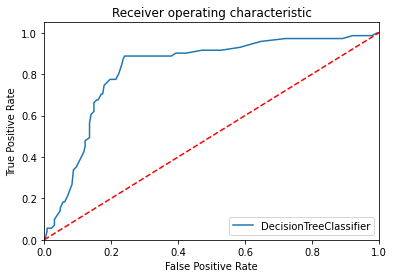

In [118]:
#ploting Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)
rf_roc_auc = roc_auc_score(y_test, dt.predict(x_test))
fpr,tpr,thersholds = roc_curve(y_test,rf.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='DecisionTreeClassifier'%rf_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

* Here the plot contains x axis false positive rate and y axis contains true positve rate in the Decision Tree Classifier curve

## Evaluating Final Model

In [119]:
Final_mod = DecisionTreeClassifier()
Final_mod.fit(x_train,y_train)
pred = Final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

76.33333333333333


### Saving The Model

In [120]:
import joblib
joblib.dump(Final_mod,'Insurance Claim Fraud Detection.csv')

['Insurance Claim Fraud Detection.csv']

* Model has saved

## Prediction Method

In [122]:
dt= DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred_dt=dt.predict(x_test)
preds=dt.predict(x_test)
print(preds[:36])
print(y_test[:36].values)

[0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0]
[0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1]


* The train and test data is balanced most of classifier methods and hit the 77% accuracy with the dataset.